In [6]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
white_wine = pd.read_csv(Path('Resources/White.csv'))
white_wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018


In [8]:
white_wine.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
dtype: object

In [9]:
for i in range(len(white_wine['Price'])):
    if white_wine['Price'][i] >= 21:
        white_wine.at[i,'Price'] = 1
    else:
        white_wine.at[i,'Price'] = 0

In [10]:
white_wine.head(20)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,0.0,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,1.0,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,1.0,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,0.0,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,0.0,2018
5,Chardonnay 2019,Germany,Pfalz,Schneider,3.7,25,0.0,2019
6,Goldloch Riesling GG 2016,Germany,Nahe,Diel,4.1,25,1.0,2016
7,Kieselberg GG 2015,Germany,Pfalz,Von Winning,4.1,25,1.0,2015
8,Catarratto 2019,Italy,Terre Siciliane,Feudi Branciforti dei Bordonaro,3.8,25,0.0,2019
9,Safari Pecorino 2017,Italy,Terre di Chieti,Bove,3.4,25,0.0,2017


In [11]:
white_wine.value_counts("Price")

Price
0.0    2849
1.0     915
dtype: int64

In [12]:
white_wine = white_wine[white_wine.Year != "N.V."]

In [13]:
white_wine.value_counts("Year")

Year
2018    1440
2017     787
2019     588
2016     484
2015     250
2014      85
2013      42
2012      26
2011      24
2010       5
2006       5
2005       4
2003       3
2007       3
2008       3
2020       2
2009       2
2004       2
1999       2
1998       1
1993       1
dtype: int64

In [14]:
y = white_wine["Price"]

X = white_wine.drop(columns=["Price", "Name", "Country", "Region", "Winery"])

In [15]:
y.head(20)

0     0.0
1     1.0
2     1.0
3     0.0
4     0.0
5     0.0
6     1.0
7     1.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    0.0
Name: Price, dtype: float64

In [16]:
X.head()

,Rating,NumberOfRatings,Year
0,3.8,25,2017
1,4.3,25,2010
2,4.2,25,2017
3,3.9,25,2018
4,3.9,25,2018


In [17]:
y.value_counts()

0.0    2844
1.0     915
Name: Price, dtype: int64

In [18]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assigned a random_state of 1 to the function

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(2819, 3)

In [19]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [20]:
predictions = classifier.predict(X_test)

In [21]:
balanced_accuracy_score(y_test, predictions)

0.7468323721433002

In [22]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)

[[677  34]
 [105 124]]


In [23]:
class_report = classification_report(y_test, predictions)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       711
         1.0       0.78      0.54      0.64       229

    accuracy                           0.85       940
   macro avg       0.83      0.75      0.77       940
weighted avg       0.85      0.85      0.84       940



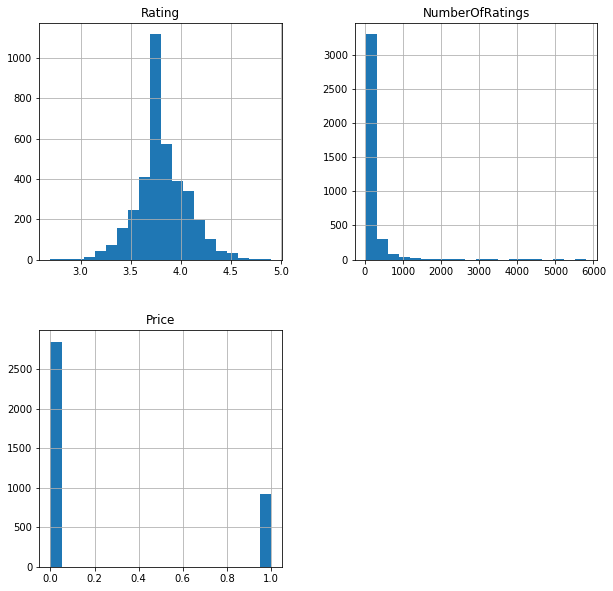

In [25]:
white_wine.hist(bins=20, figsize=(10, 10))
mp.show()

                   Rating  NumberOfRatings     Price
Rating           1.000000         0.036594  0.524760
NumberOfRatings  0.036594         1.000000 -0.051094
Price            0.524760        -0.051094  1.000000


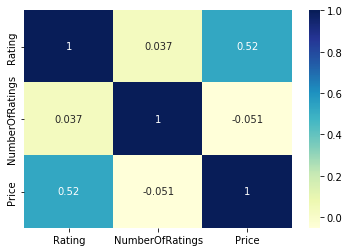

In [26]:
print(white_wine.corr())
dataplot = sb.heatmap(white_wine.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()